In [1]:
from lbmpy.session import *

# Demo: Create lbmpy Method from Scratch

<img src='../img/collision_space.svg' width="90%">


### Defining transformation to collision space

In [2]:
from lbmpy.moments import moment_matrix, moments_up_to_component_order, exponents_to_polynomial_representations
moment_exponents = list(moments_up_to_component_order(2, 2))
moment_exponents

In [3]:
moments = exponents_to_polynomial_representations(moment_exponents)
moments

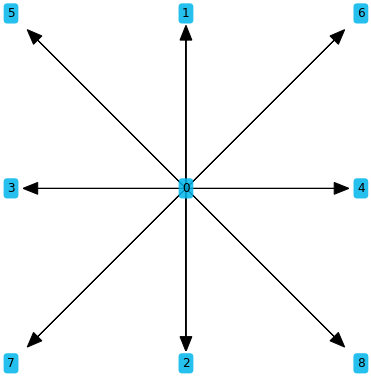

In [4]:
d2q9 = LBStencil(Stencil.D2Q9, ordering='walberla')
d2q9.plot()

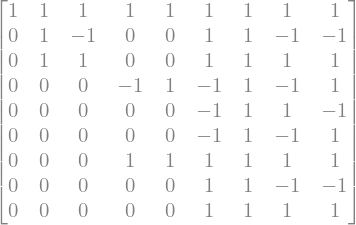

In [5]:
M = moment_matrix(moments, stencil=d2q9)
M

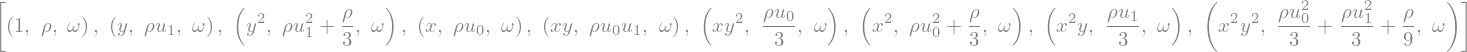

In [6]:
from lbmpy.maxwellian_equilibrium import get_equilibrium_values_of_maxwell_boltzmann_function

eq_moments = get_equilibrium_values_of_maxwell_boltzmann_function(moments, order=2, dim=2, 
                                                                  c_s_sq=sp.Rational(1, 3),
                                                                  space="moment")
omega = sp.symbols("omega")
relaxation_info = [(moment, eq_value, omega) for moment, eq_value in zip(moments, eq_moments)]
relaxation_info

In [7]:
from lbmpy.methods.creationfunctions import create_generic_mrt

force_model = forcemodels.Guo(sp.symbols("F_:2"))
method = create_generic_mrt(d2q9, relaxation_info, compressible=False, force_model=force_model)
method

Moment,Eq. Value,Relaxation Rate
$1$,$\rho$,$\omega$
$y$,$\rho u_{1}$,$\omega$
$y^{2}$,$\rho u_{1}^{2} + \frac{\rho}{3}$,$\omega$
$x$,$\rho u_{0}$,$\omega$
$x y$,$\rho u_{0} u_{1}$,$\omega$
$x y^{2}$,$\frac{\rho u_{0}}{3}$,$\omega$
$x^{2}$,$\rho u_{0}^{2} + \frac{\rho}{3}$,$\omega$
$x^{2} y$,$\frac{\rho u_{1}}{3}$,$\omega$
$x^{2} y^{2}$,$\frac{\rho u_{0}^{2}}{3} + \frac{\rho u_{1}^{2}}{3} + \frac{\rho}{9}$,$\omega$


### Example of a update equation without simplifications

In [8]:
collision_rule = method.get_collision_rule()
collision_rule

$$partial_{m m1 e 0} \leftarrow f_{3} + f_{5} + f_{7}$$
$$partial_{m 0 e 0} \leftarrow f_{0} + f_{1} + f_{2}$$
$$partial_{m 1 e 0} \leftarrow f_{4} + f_{6} + f_{8}$$
$$partial_{m m1 e 1} \leftarrow f_{5} - f_{7}$$
$$partial_{m 0 e 1} \leftarrow f_{1} - f_{2}$$
$$partial_{m 1 e 1} \leftarrow f_{6} - f_{8}$$
$$partial_{m m1 e 2} \leftarrow f_{5} + f_{7}$$
$$partial_{m 0 e 2} \leftarrow f_{1} + f_{2}$$
$$partial_{m 1 e 2} \leftarrow f_{6} + f_{8}$$
$$m_{00} \leftarrow partial_{m 0 e 0} + partial_{m 1 e 0} + partial_{m m1 e 0}$$
$$m_{10} \leftarrow partial_{m 1 e 0} - partial_{m m1 e 0}$$


### Generic simplification strategy - common subexpresssion elimination

In [9]:
generic_strategy = ps.simp.SimplificationStrategy()
generic_strategy.add(ps.simp.sympy_cse)
generic_strategy.create_simplification_report(collision_rule)

Name,Runtime,Adds,Muls,Divs,Total
OriginalTerm,-,85,68,0,153
sympy_cse,31.54 ms,72,49,0,121


### A custom simplification strategy for moment-based methods

In [10]:
simplification_strategy = create_simplification_strategy(method)
simplification_strategy.create_simplification_report(collision_rule)
simplification_strategy.add(ps.simp.sympy_cse)